In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [30]:
dataset_dir = r"C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\FinalDataset"

In [31]:
import os

# Path to the main directory containing the class folders
main_directory = r"C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\FinalDataset"

# Dictionary to store label counts
label_counts = {}

# Traverse the folders and count files
for label in os.listdir(main_directory):
    label_path = os.path.join(main_directory, label)
    if os.path.isdir(label_path):  # Check if it's a directory
        # Count the .wav files in the folder
        wav_files = [f for f in os.listdir(label_path) if f.endswith('.wav')]
        label_counts[label] = len(wav_files)

# Display the results
for label, count in label_counts.items():
    print(f"{label}: {count}")


A1: 2000
A2: 2000
A3: 2000
A4: 2000


In [32]:
import os
import pandas as pd

# Path to the main directory containing the class folders
main_directory = r"C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\FinalDataset"

# List to store data for DataFrame
data = []

# Traverse the folders and collect file paths and labels
for label in os.listdir(main_directory):
    label_path = os.path.join(main_directory, label)
    if os.path.isdir(label_path):  # Check if it's a directory
        for file in os.listdir(label_path):
            if file.endswith('.wav'):  # Check if it's a .wav file
                file_path = os.path.join(label_path, file)
                data.append({"speech": file_path, "label": label})

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_file_path = "speech_labels.csv"
df.to_csv(csv_file_path, index=False)

# Print confirmation
print(f"Data saved to {csv_file_path}")


Data saved to speech_labels.csv


In [33]:
df.head()

speech label
0  C:\Users\OMOLP049\Documents\Mritunjay Gupta\Ne...    A1
1  C:\Users\OMOLP049\Documents\Mritunjay Gupta\Ne...    A1
2  C:\Users\OMOLP049\Documents\Mritunjay Gupta\Ne...    A1
3  C:\Users\OMOLP049\Documents\Mritunjay Gupta\Ne...    A1
4  C:\Users\OMOLP049\Documents\Mritunjay Gupta\Ne...    A1

In [34]:
df['label'].value_counts()


label
A1    2000
A2    2000
A3    2000
A4    2000
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

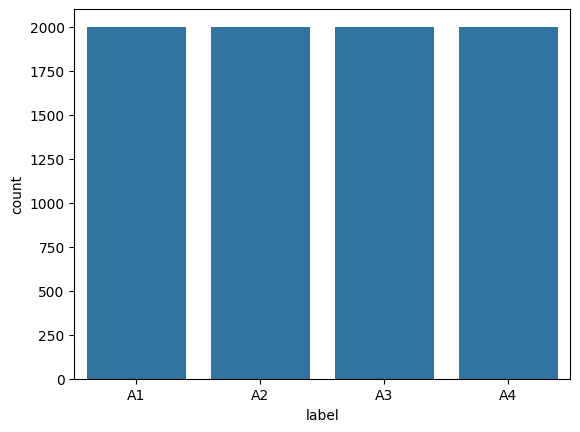

In [35]:
sns.countplot(data=df, x='label')


In [37]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [38]:
def waveplot(data, sr, label):
    plt.figure(figsize=(10, 4))
    plt.title(f"Waveform of {label} Audio", size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

def spectrogram(data, sr, label):

    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(f"Spectrogram of {label} Audio", size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(label="Decibels")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()


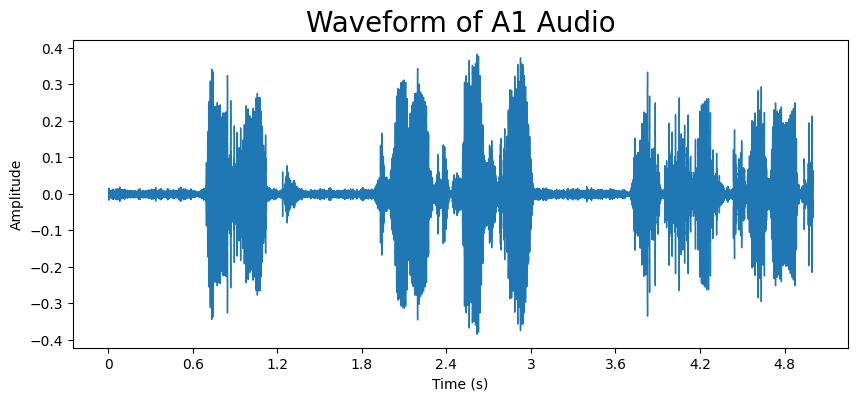

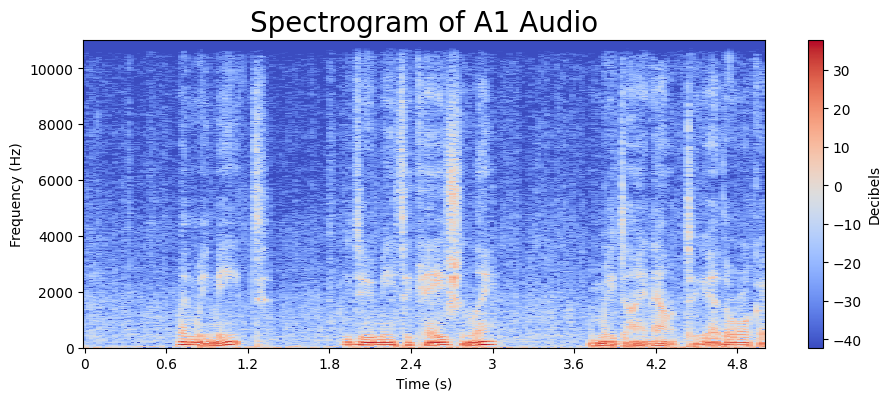

In [39]:
label = 'A1'
path = np.array(df['speech'][df['label']==label])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, label)
spectrogram(data, sampling_rate, label)
Audio(path)

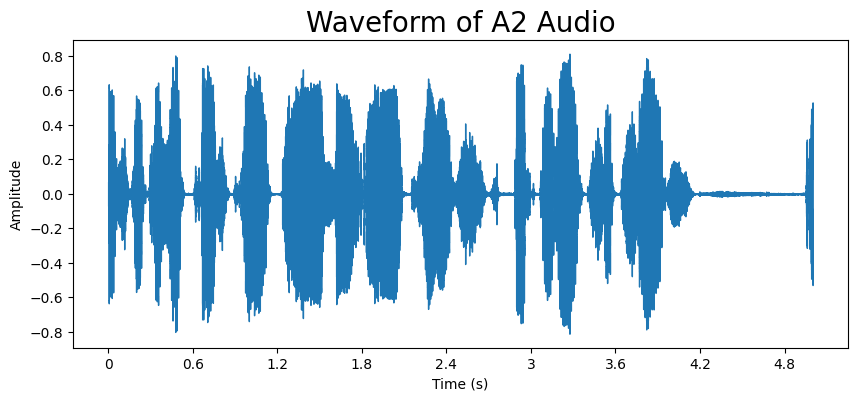

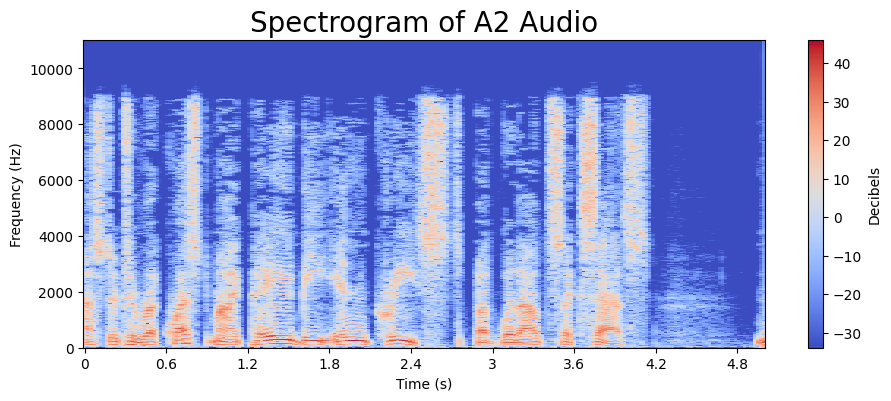

In [40]:
label = 'A2'
path = np.array(df['speech'][df['label']==label])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, label)
spectrogram(data, sampling_rate, label)
Audio(path)

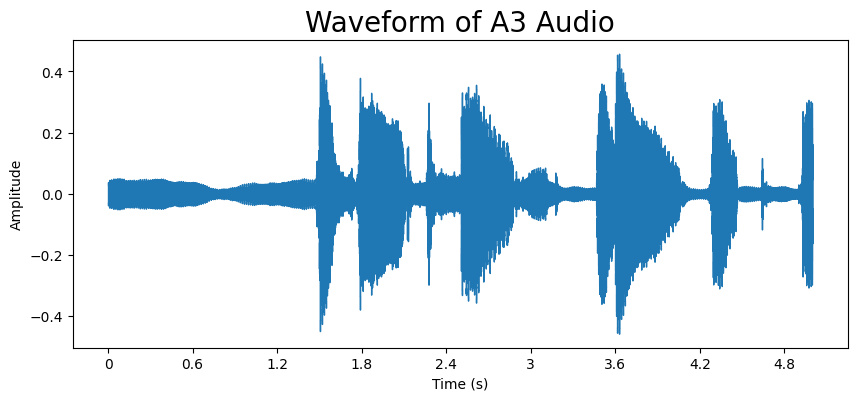

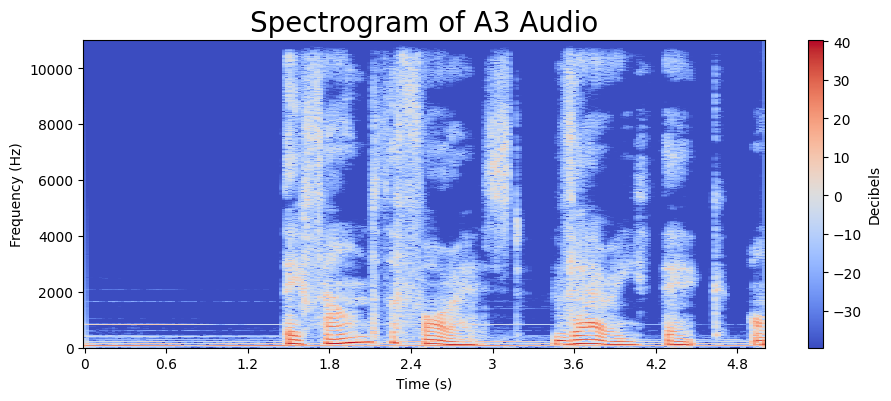

In [41]:
label = 'A3'
path = np.array(df['speech'][df['label']==label])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, label)
spectrogram(data, sampling_rate, label)
Audio(path)

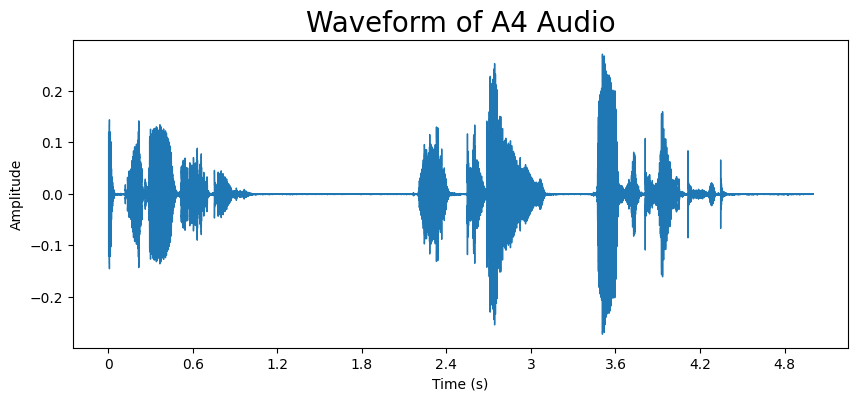

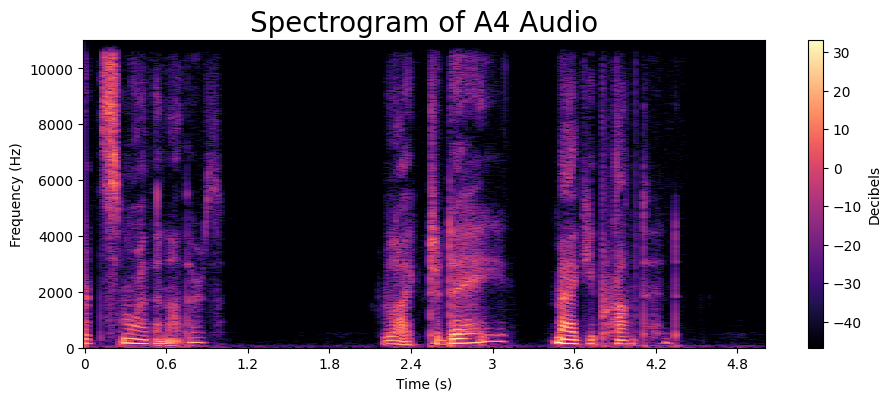

In [42]:
label = 'A4'
path = np.array(df['speech'][df['label']==label])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, label)
spectrogram(data, sampling_rate, label)
Audio(path)

In [43]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [44]:
extract_mfcc(df['speech'][0])

array([-3.0510172e+02,  1.0207636e+02,  8.1706009e+00,  2.7125757e+01,
        1.6065002e+01,  1.2351072e+01,  3.8321862e+00,  1.0866027e+01,
        6.7508250e-01,  2.1174700e+00, -4.3627472e+00,  5.1465979e+00,
       -5.0716839e+00,  2.1061528e+00, -1.4930283e+00,  1.3840338e+00,
       -2.5516779e+00,  3.6931393e+00, -1.3512105e+00, -1.3622643e+00,
       -5.6288023e+00,  1.8951538e+00, -3.6343837e+00, -1.3921826e+00,
       -3.6027207e+00, -6.0297936e-01, -4.2927761e+00,  2.7030042e-01,
       -3.4795475e+00,  2.0898836e+00,  7.1001679e-01,  3.4200482e+00,
        4.4845253e-01,  2.4591048e+00, -2.2731080e+00,  1.2553084e+00,
       -9.4512850e-01, -2.4381262e-01,  9.0267283e-01,  3.7667099e-01],
      dtype=float32)

In [45]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [47]:
X_mfcc

0       [-305.1017, 102.07636, 8.170601, 27.125757, 16...
1       [-276.64664, 121.32983, 10.408928, 17.280401, ...
2       [-272.61835, 89.34274, 14.735063, 32.462822, 2...
3       [-268.81604, 109.8367, 1.4274558, 24.59115, 10...
4       [-269.76782, 103.66651, 4.6729226, 22.826319, ...
                              ...                        
7995    [-383.1591, 103.96976, -2.9638743, 3.800256, 1...
7996    [-360.26923, 59.233658, -0.55830854, 24.117285...
7997    [-388.9734, 89.59348, 4.8106, 0.38474202, 11.2...
7998    [-428.31885, 51.19268, 8.2902155, 13.463242, 1...
7999    [-349.75266, 95.69537, 4.5787363, 9.35372, 9.6...
Name: speech, Length: 8000, dtype: object

In [48]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(8000, 40)

In [49]:
## input split
X = np.expand_dims(X, -1)
X.shape

(8000, 40, 1)

In [50]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [51]:
y = y.toarray()

In [52]:
y.shape

(8000, 4)

# LSTM 

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten

In [24]:
model = tf.keras.Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(40,1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax')  # 7 for number of emotion classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 8, 256)         │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,508 (1.79 MB)

 Trainable params: 469,508 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model


from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Train the model
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
mcp_save = ModelCheckpoint('model/class2_np.keras', save_best_only=True, monitor='val_loss', mode='min')

history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=128, callbacks=[mcp_save, lr_reduce])



Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.6805 - loss: 0.7704 - val_accuracy: 0.9669 - val_loss: 0.1592 - learning_rate: 0.0010
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9862 - loss: 0.0488 - val_accuracy: 0.9444 - val_loss: 0.1609 - learning_rate: 0.0010
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.9819 - val_loss: 0.0525 - learning_rate: 0.0010
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.7694 - val_loss: 0.7128 - learning_rate: 0.0010
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9957 - loss: 0.0175 - val_accuracy: 0.9962 - val_loss: 0.0207 - learning_rate: 0.0010
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9971 - loss: 0.0092 - val_accuracy: 0.9987 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9986 - loss: 0.0033 -

# CNN SIMPLE

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [60]:
from keras import layers, Sequential

model = Sequential([
    layers.Conv1D(
        64,
        kernel_size=3,
        activation='relu',
        input_shape=(40, 1)
    ),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(
        64,
        kernel_size=3,
        activation='relu'
    ),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(
        64,
        kernel_size=3,
        activation='relu'
    ),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')  # Adjust according to your classes
])


In [61]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 17, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 6, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,828 (491.52 KB)

 Trainable params: 125,828 (491.52 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [63]:
# Train the model


from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Train the model
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
mcp_save = ModelCheckpoint('model/cnn_np.keras', save_best_only=True, monitor='val_loss', mode='min')

history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=128, callbacks=[mcp_save, lr_reduce])



Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5943 - loss: 1.4023 - val_accuracy: 0.3613 - val_loss: 1.2844 - learning_rate: 0.0100
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9618 - loss: 0.1539 - val_accuracy: 0.7944 - val_loss: 0.5869 - learning_rate: 0.0100
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9862 - loss: 0.0683 - val_accuracy: 0.9112 - val_loss: 0.3847 - learning_rate: 0.0100
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9940 - loss: 0.0419 - val_accuracy: 0.9513 - val_loss: 0.3152 - learning_rate: 0.0100
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9965 - loss: 0.0278 - val_accuracy: 0.9581 - val_loss: 0.2469 - learning_rate: 0.0100
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9977 - loss: 0.0199 - val_accuracy: 0.9644 - val_loss: 0.2667 - learning_rate: 0.0100
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9978 - loss: 0.0181 - va

# Make Prediction

In [3]:
import keras
import numpy as np
import librosa
import sounddevice as sd

class LiveVoiceRecognition:
    def __init__(self, model_path):
        self.model_path = model_path
        self.model = self.load_model()

    def load_model(self):
        """
        Load the trained model.
        """
        model = keras.models.load_model(self.model_path)
        print("Model loaded successfully.")
        return model

    def record_audio(self, duration=5, sampling_rate=22050):
        """
        Record live audio from the microphone.
        """
        print("Recording...")
        audio_data = sd.rec(int(duration * sampling_rate), samplerate=sampling_rate, channels=1)
        sd.wait()  # Wait until the recording is finished
        print("Recording completed.")
        return np.squeeze(audio_data)

    def extract_features(self, audio_data, sampling_rate=22050):
        """
        Extract MFCC features from the recorded audio.
        """
        mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        return mfccs

    def make_prediction(self, features):
        """
        Make a prediction based on extracted features.
        """
        x = np.expand_dims(features, axis=0)  # Add batch dimension
        x = np.expand_dims(x, axis=2)         # Add channel dimension
        prediction = np.argmax(self.model.predict(x), axis=1)[0]
        return self.map_prediction_to_person(prediction)

    @staticmethod
    def map_prediction_to_person(prediction):
        """
        Map the model's output to a specific person.
        """
        person_map = {
            0: "A1",
            1: "A2",
            2: "A3",
            3: "A4"
        }
        return person_map.get(prediction, "Unknown")

# Instantiate the class
recognition = LiveVoiceRecognition(model_path=r'C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\model\class2_np.keras')

# Record and process live audio
audio = recognition.record_audio(duration=5)
features = recognition.extract_features(audio)
person = recognition.make_prediction(features)

# Output the result
print("The voice belongs to:", person)


Model loaded successfully.
Recording...
Recording completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The voice belongs to: A2


# Prediction for sample 

In [9]:
import keras
import numpy as np
import librosa
import soundfile as sf

class LiveVoiceRecognition:
    def __init__(self, model_path):
        """
        Initialize the class with the path to the model.
        - model_path: Path to the model predicting the speaker (A1, A2, etc.).
        """
        self.model_path = model_path
        self.model = self.load_model()

    def load_model(self):
        """
        Load the trained model.
        """
        model = keras.models.load_model(self.model_path)
        print("Model loaded successfully.")
        return model

    def load_audio(self, audio_file_path, sampling_rate=22050):
        """
        Load an audio file for processing.
        - audio_file_path: Path to the audio file.
        """
        print(f"Loading audio file from: {audio_file_path}")
        audio_data, _ = librosa.load(audio_file_path, sr=sampling_rate)
        print("Audio loaded successfully.")
        return audio_data

    def extract_features(self, audio_data, sampling_rate=22050):
        """
        Extract MFCC features from the loaded audio.
        """
        mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        return mfccs

    def make_prediction(self, features):
        """
        Make a prediction based on extracted features.
        """
        x = np.expand_dims(features, axis=0)  # Add batch dimension
        x = np.expand_dims(x, axis=2)         # Add channel dimension
        prediction = np.argmax(self.model.predict(x), axis=1)[0]
        return self.map_prediction_to_person(prediction)

    @staticmethod
    def map_prediction_to_person(prediction):
        """
        Map the model's output to a specific person.
        """
        person_map = {
            0: "A1",
            1: "A2",
            2: "A3",
            3: "A4"
        }
        return person_map.get(prediction, "Unknown")

# Instantiate the class with the model path
recognition = LiveVoiceRecognition(model_path=r'C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\model\cnn_np(99).keras')

# Path to your audio file (replace with the actual path)
audio_file_path = r'C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\FinalDataset\A1\chunk_27.wav'  # Update this path to your audio file

# Load the audio sample
audio = recognition.load_audio(audio_file_path)

# Extract features from the audio sample
features = recognition.extract_features(audio)

# Make the prediction
person = recognition.make_prediction(features)

# Output the result
print("The voice belongs to:", person)


Model loaded successfully.
Loading audio file from: C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\FinalDataset\A1\chunk_27.wav
Audio loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
The voice belongs to: A1


# MAKE Prediction for both model

In [7]:
import keras
import numpy as np
import librosa
import sounddevice as sd
import tensorflow as tf

class LiveVoiceEmotionRecognition:
    def __init__(self, speaker_model_path, emotion_model_path):
        """
        Initialize the class with the paths to both models.
        - speaker_model_path: Path to the model predicting the speaker (a1, a2, etc.).
        - emotion_model_path: Path to the model predicting emotions (happy, sad, etc.).
        """
        self.speaker_model = self.load_model(speaker_model_path)
        self.emotion_model = self.load_model(emotion_model_path)

    def load_model(self, model_path):
        """
        Load the trained model.
        """
        model = keras.models.load_model(model_path)
        print(f"Model loaded from {model_path}.")
        return model

    def record_audio(self, duration=5, sampling_rate=22050):
        """
        Record live audio from the microphone.
        """
        print("Recording...")
        audio_data = sd.rec(int(duration * sampling_rate), samplerate=sampling_rate, channels=1)
        sd.wait()  # Wait until the recording is finished
        print("Recording completed.")
        return np.squeeze(audio_data)

    def extract_features(self, audio_data, sampling_rate=22050):
        """
        Extract MFCC features from the recorded audio.
        """
        mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        return mfccs

    def make_speaker_prediction(self, features):
        """
        Predict who is speaking based on extracted features.
        """
        x = np.expand_dims(features, axis=0)  # Add batch dimension
        x = np.expand_dims(x, axis=2)         # Add channel dimension
        prediction = np.argmax(self.speaker_model.predict(x), axis=1)[0]
        return self.map_speaker_prediction(prediction)

    def make_emotion_prediction(self, features):
        """
        Predict the emotion of the speaker based on extracted features.
        """
        x = np.expand_dims(features, axis=0)  # Add batch dimension
        x = np.expand_dims(x, axis=2)         # Add channel dimension
        prediction = np.argmax(self.emotion_model.predict(x), axis=1)[0]
        return self.map_emotion_prediction(prediction)

    @staticmethod
    def map_speaker_prediction(prediction):
        """
        Map the model's output to a specific person.
        """
        person_map = {
            0: "A1",
            1: "A2",
            2: "A3",
            3: "A4"
        }
        return person_map.get(prediction, "Unknown")

    @staticmethod
    def map_emotion_prediction(prediction):
        """
        Map the model's output to a specific emotion.
        """
        emotion_map = {
            0: 'neutral',
            1: 'happy',
            2: 'sad',
            3: 'angry',
            4: 'fearful',
            5: 'disgust',
        }
        return emotion_map.get(prediction, "Unknown Emotion")


# Instantiate the class with the model paths
recognition = LiveVoiceEmotionRecognition(
    speaker_model_path=r'C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\model\cnn_np(99).keras',
    emotion_model_path=r'C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\model\model(41)CNN.h5'
)

# Record and process live audio
audio = recognition.record_audio(duration=5)
features = recognition.extract_features(audio)

# Get predictions
person = recognition.make_speaker_prediction(features)
emotion = recognition.make_emotion_prediction(features)

# Output the results
print(f"The voice belongs to: {person}")
print(f"The emotion detected is: {emotion}")


Model loaded from C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\model\cnn_np(99).keras.


Model loaded from C:\Users\OMOLP049\Documents\Mritunjay Gupta\New\model\model(41)CNN.h5.
Recording...
Recording completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
The voice belongs to: A2
The emotion detected is: neutral
